In [2]:
import matplotlib.pyplot as plt


from typing import Tuple, Optional

import torch
from torch import tensor, as_tensor, float32, ones, zeros, eye, randn, rand, Tensor, sqrt
from math import sqrt
# # from torch.distributions import MultivariateNormal

# from sbi.utils import BoxUniform
# from numpy import polynomial
# from gbi import distances


# from gbi.benchmark.tasks.linear_gaussian.task import LinearGaussian

# 1D uniform noise

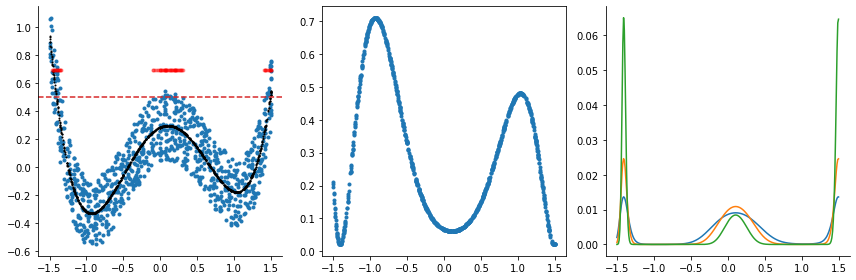

In [24]:
from gbi.benchmark.tasks.uniform_1d.task import UniformNoise1D
# from typing import Tuple, Optional, Union

# import torch
# from torch import tensor, as_tensor, float32, ones, zeros, eye, randn, Tensor
# from sbi.utils import BoxUniform


# class UniformNoise1D:
#     def __init__(
#         self,
#         prior_bounds: Tuple = (-1.5, 1.5),
#         beta: float = 1.0,
#         seed: int = 0,
#         poly_coeffs: Tensor = Tensor([0.1627, 0.9073, -1.2197, -1.4639, 1.4381]),
#         epsilon: Union[Tensor, float] = 0.25,
#         x_o: Optional[Tensor] = None,
#     ):
#         # Set seed.
#         _ = torch.manual_seed(seed)

#         # Make prior for theta.
#         self.prior = BoxUniform(prior_bounds[0] * ones(1), prior_bounds[1] * ones(1))

#         # noise_likelihood model.
#         self.noise_likelihood = BoxUniform(-epsilon * ones(1), epsilon * ones(1))

#         # Set polynomial coefficients; default makes good curve.
#         self.poly_coeffs = poly_coeffs

#         # Set uniform noise half-width.
#         self.epsilon = epsilon

#         # Set GBI likelihood temperature.
#         self.beta = beta

#         # Set observation
#         self.x_o = x_o

#     def simulate_noiseless(self, theta: Tensor) -> Tensor:
#         """Noiseless simulator."""
#         return (
#             torch.hstack([(0.8 * (theta + 0.25)) ** i for i in range(5)])
#             * self.poly_coeffs
#         ).sum(1, keepdim=True)

#     def simulate(self, theta: Tensor) -> Tensor:
#         """Simulator with U[-eps, eps] noise applied."""
#         # Get uniform noise of [-epsilon, epsilon].
#         noise = self.noise_likelihood.sample((theta.shape[0],))  # type: ignore
#         return self.simulate_noiseless(theta) + noise

#     def distance_fn(self, theta):
#         """Computes E_{x|t}[(x - x_o)^2]."""
#         x_true = self.simulate_noiseless(theta)
#         x_low = x_true - self.epsilon
#         x_high = x_true + self.epsilon
#         expected_value_of_d = (self._eval_distance_integral(
#             x_high
#         ) - self._eval_distance_integral(x_low)).squeeze(1)
#         return expected_value_of_d

#     def potential(self, theta):
#         """Potential for GBI ground truth posterior."""
#         term1 = -self.beta * self.distance_fn(theta)
#         return term1 + self.prior.log_prob(theta)

#     def _eval_distance_integral(self, x):
#         """Integral of (x-x_o)^2 (without constant)."""
#         assert self.x_o is not None
#         return (x**3) / 3 - self.x_o * x**2 + x * self.x_o**2

#     # def true_posterior_linear_gaussian(self, x_o: Tensor) -> MultivariateNormal:
#     #     """Returns the Bayes posterior."""

#     #     num_trials, *_ = x_o.shape
#     #     x_o_mean = x_o.mean(0)
#     #     likelihood_mean = x_o_mean - self.likelihood_shift

#     #     product_mean, product_cov = self.multiply_gaussian_pdfs(
#     #         likelihood_mean,
#     #         1 / num_trials * self.likelihood_cov,
#     #         self.prior_mean,
#     #         self.prior_cov,
#     #     )

#     #     posterior_dist = MultivariateNormal(product_mean, product_cov)

#     #     return posterior_dist

#     # def multiply_gaussian_pdfs(self, mu1, s1, mu2, s2) -> Tuple[Tensor, Tensor]:
#     #     """Util for computing the Bayes posterior."""
#     #     inv_s1s2 = torch.inverse(s1 + s2)

#     #     # posterior mean = s2 * inv_s1pluss2 * mu1 + s1 * inv_s1pluss2 * mu2
#     #     product_mean = torch.mv(torch.mm(s2, inv_s1s2), mu1) + torch.mv(
#     #         torch.mm(s1, inv_s1s2), mu2
#     #     )

#     #     # posterior cov = s1 * inv_s1pluss2 * s2
#     #     product_cov = torch.mm(torch.mm(s1, inv_s1s2), s2)

#     #     return product_mean, product_cov


task = UniformNoise1D(x_o = Tensor([0.5]), beta=100)

theta = task.prior.sample((1000,))
x = task.simulate(theta)
x_true = task.simulate_noiseless(theta)
lh = task.noise_likelihood.log_prob(task.x_o - x_true)


plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(theta, x, '.')
plt.plot(theta, x_true, '.k', ms=2)
plt.plot(theta, lh, '.r', alpha=0.1)
plt.axhline(task.x_o, color='C3', ls='--')
plt.gca().spines[['right', 'top']].set_visible(False)

plt.subplot(1,3,2)
d_true = task.distance_fn(theta)
plt.plot(theta, d_true, '.')
# plt.plot(theta, distances.mse_dist((x_true-task.epsilon).unsqueeze(1), x_o.unsqueeze(1)), '.')
# plt.plot(theta, distances.mse_dist((x_true+task.epsilon).unsqueeze(1), x_o.unsqueeze(1)), '.')

plt.subplot(1,3,3)
theta_grid=torch.arange(-1.5,1.5,0.01).unsqueeze(1)
for beta in [0.1, 0.2, 0.5]:
    plt.plot(theta_grid, (task.potential(theta_grid)*beta).exp()/(task.potential(theta_grid)*beta).exp().sum(), '-')

plt.gca().spines[['right', 'top']].set_visible(False)
plt.tight_layout()

---
# two moons

In [26]:
from gbi.benchmark.tasks.two_moons.task import TwoMoonsGBI

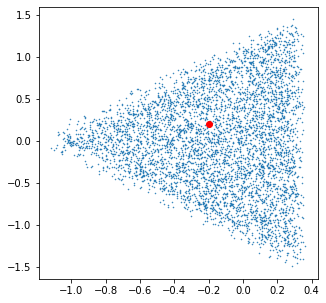

In [27]:
x_o = Tensor([-0.2,0.2]) # Tensor([ 0.0030, -0.6458])

task = TwoMoonsGBI(x_o=x_o, beta=100)
theta = task.prior.sample((5_000,))
x = task.simulate(theta)

plt.figure(figsize=(5,5))
plt.plot(x[:,0], x[:,1], '.', ms=1)
plt.plot(task.x_o[0], task.x_o[1], 'or')

In [ ]:
# task. = Tensor([ 0.0030, -0.6458]) 
# task.x_o = Tensor([-0.2,0.2])
dist_sample = (x-task.x_o).pow(2).mean(1)
# dist_sample = mse_dist(x.unsqueeze(0), task.x_o.unsqueeze(0))
dist_gt = task.distance_fn(theta)


/home/rdgao/miniconda3/envs/gbi/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


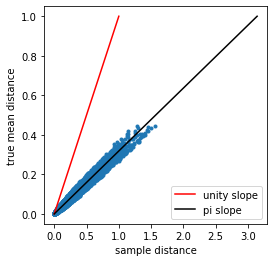

In [49]:
plt.figure(figsize=(4,4))
plt.plot(dist_sample, dist_gt,  '.')
plt.plot([0,1], [0,1], '-r', label='unity slope')
plt.plot([0,torch.pi], [0,1], '-k', label='pi slope')
plt.xlabel('sample distance'); plt.ylabel('true mean distance')
plt.legend()

In [25]:
lhf = task.potential(theta)
plt.figure(figsize=(5,5))
plt.scatter(theta[:,0], theta[:,1], c=lhf.exp(), alpha=0.5)

IndexError: index 1 is out of bounds for dimension 1 with size 1

<Figure size 360x360 with 0 Axes>

In [10]:
x_reses = [100, 200, 500, 1000]
dists = []
task = TwoMoonsGBI(x_o=Tensor([ 0.0030, -0.6458]))
theta = task.prior.sample((10_000,))
for i_r, x_r in enumerate(x_reses):
    print(x_r)
    task = TwoMoonsGBI(x_o=Tensor([ 0.0030, -0.6458]), x_resolutions=Tensor([x_r, x_r]))
    dists.append(task.potential(theta))

100
200
500
1000


100 0.9973580421946514 tensor(9.0820e-05)
200 0.9997465143806148 tensor(8.7149e-06)
500 0.999951692591256 tensor(1.6624e-06)
1000 1.0 tensor(0.)


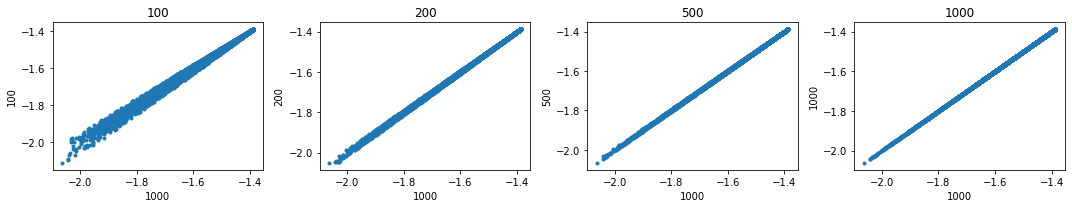

In [11]:
import numpy as np
plt.figure(figsize=(3*5,3))
for i in range(4):
    plt.subplot(1,4,i+1)    
    plt.plot(dists[-1], dists[i], '.')
    print(x_reses[i], np.corrcoef(dists[-1], dists[i])[0,1], ((dists[-1]-dists[i])**2).mean(0))
    plt.xlabel(x_reses[-1]); plt.ylabel(x_reses[i])
    plt.title(x_reses[i])
    
plt.tight_layout()

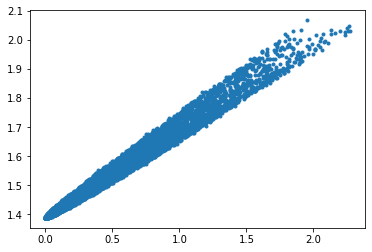

In [21]:
x = task.simulate(theta)
dist_samples = (x-task.x_o).pow(2).mean(1)
plt.plot(dist_samples, -dists[-2]/task.beta, '.')

In [4]:
# task._likelihood(theta[104], task.x_grid).exp().sum()*task.dx2*torch.pi

task = TwoMoonsGBI(x_resolutions=Tensor([1000,1000]), x_o=Tensor([-0.2, 0]), x_limits=Tensor([[-0.31, -0.16], [.4,0.75]]))
# task.distance_fn(theta)
# task = task.make_x_grid()
task.x_grid, task.dx2 = task.make_x_grid()

/home/rdgao/miniconda3/envs/gbi/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [5]:
import sbibm
sbibm.__version__

'1.0.7'

In [150]:
diffusion_scale = 0.5
counter = 0
x_min, x_max = x.min(0)[0], x.max(0)[0]    
x_miss = x[torch.randint(high=x.shape[0], size=(10,))]
mask = torch.zeros((x_miss.shape[0],))
while (not (mask>0).all()) and counter < 10000:
    # all out of bounds = 1

    x_miss += ((torch.randn((10,x.shape[1]))>0).to(float)-0.5)*2*x.std(0) * (1.-mask.unsqueeze(1)) * diffusion_scale
    mask = ((x_miss < x_min).any(1) | (x_miss > x_max).any(1)).to(float)
    # x_miss = x[rand_idx] + ((torch.randn((10,x.shape[1]))>0).to(float)-0.5)*2*x.std(0)*2
    counter +=1


counter

16

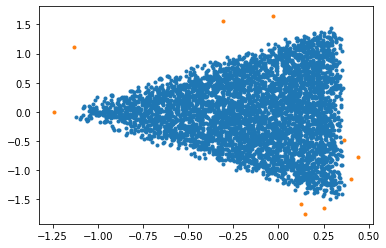

In [151]:
plt.plot(x[:,0], x[:,1], '.')
plt.plot(x_miss[:,0], x_miss[:,1], '.')

In [62]:
# total = [task._likelihood(th, task.x_grid).exp().sum()*task.dx2*torch.pi for th in theta]

th = theta[3]
p = task._map_fun_inv(th.unsqueeze(0), task.x_grid).squeeze(0)
# p = x_shift
if p.ndim == 1:
    p = p.reshape(1, -1)

u = p[:, 0] - task.simulator_params["base_offset"]

v = p[:, 1]

r = torch.sqrt(u ** 2 + v ** 2)


l = task._likelihood(th, task.x_grid).exp()
l = task._likelihood(th, task.x_grid, log=True).exp()

guess= (task._likelihood(th, task.x_grid, log=True).exp()/r*torch.pi/10.0).sum()*task.dx2
bad_guess = (task._likelihood(th, task.x_grid, log=True).exp()).sum()*task.dx2*torch.pi

guess, bad_guess



AttributeError: 'TwoMoonsGBI' object has no attribute 'x_grid'

In [263]:
r

tensor([0.1752, 0.1748, 0.1745,  ..., 0.2217, 0.2220, 0.2223])

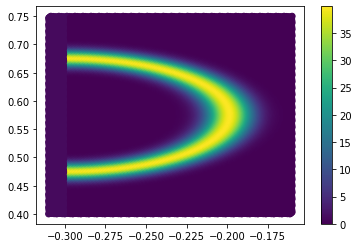

In [264]:
plt.scatter(task.x_grid[::33,0], task.x_grid[::33,1], c=l[::33])
plt.colorbar()
# r

In [265]:
(l/r*torch.pi/10.0).sum()*task.dx2

tensor(1.0229)

In [266]:
(l[::33]*torch.pi).sum()

tensor(577230.5000)

In [267]:
((l[::33]/r[::33]*torch.pi/10.0) - l[::33]*torch.pi).sum()

tensor(11732.5117)

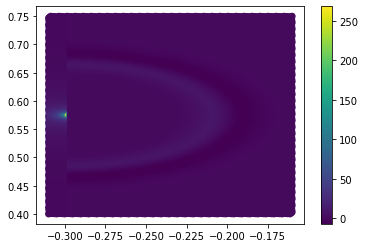

In [268]:
plt.scatter(task.x_grid[::33,0], task.x_grid[::33,1], c=(l[::33]/r[::33]*torch.pi/10.0) - l[::33]*torch.pi)
plt.colorbar()
# r

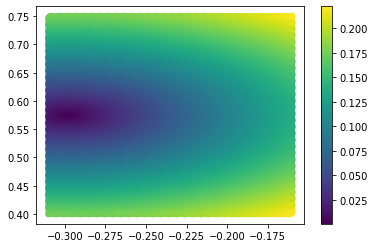

In [259]:
task.x_grid, task._likelihood(th, task.x_grid)

plt.scatter(task.x_grid[::33,0], task.x_grid[::33,1], c=r[::33])
plt.colorbar()
# r

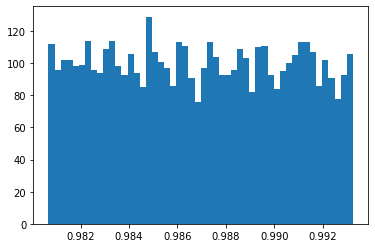

In [97]:
import numpy as np
plt.hist(np.array(total), 50);

In [101]:
x_shift = task._map_fun_inv(theta[0].unsqueeze(0), task.x_grid)

In [111]:
r

tensor([2.7045, 2.7010, 2.6975,  ..., 1.7629, 1.7666, 1.7702])